In [51]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions

import subprocess
from scipy.stats import chisquare
import os
import protfasta
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
d_domains = "../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files if f !='.ipynb_checkpoints']

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

In [53]:
results = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 1, domain_types = ["AD", "DBD"], print_output = True)
SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
results = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], results)
results

1 ENST00000356073
2 ENST00000348066
3 ENST00000379044
4 ENST00000246672
5 ENST00000288319
6 ENST00000312233
7 ENST00000317216
8 ENST00000056233
9 ENST00000335670
10 ENST00000303329
11 ENST00000373036
12 ENST00000359486
13 ENST00000389506
14 ENST00000315869
15 ENST00000377022
16 ENST00000265340
17 ENST00000377142
18 ENST00000561208
19 ENST00000339562
20 ENST00000262238
21 ENST00000428368
22 ENST00000437473
23 ENST00000373294
24 ENST00000241001
25 ENST00000372583
26 ENST00000395324
27 ENST00000403491
28 ENST00000318003
29 ENST00000250916
30 ENST00000309446
31 ENST00000355311
32 ENST00000592199
33 ENST00000355995
34 ENST00000331340
35 ENST00000434704
36 ENST00000367265
37 ENST00000380013
38 ENST00000348332
39 ENST00000262518
40 ENST00000264637
41 ENST00000239243
42 ENST00000342988
43 ENST00000358127
44 ENST00000282549
45 ENST00000341099


,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop
0,ARNT2,Q9HBZ2,2154,217,0.100743,582,49,0.084192,0,0,NaN
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,180,3,0.016667
2,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,0,0,NaN
3,CC2D1A,Q6P1N0,2856,435,0.152311,117,13,0.111111,0,0,NaN
4,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,378,23,0.060847
5,EBF3,Q9H4W6,1791,138,0.077052,240,17,0.070833,0,0,NaN
6,EGR3,Q06889,1164,101,0.086770,606,61,0.100660,0,0,NaN
7,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,198,27,0.136364
8,GLIS1,Q8NBF1,1863,303,0.162641,522,75,0.143678,0,0,NaN
9,ERG,P11308,1440,128,0.088889,573,54,0.094241,243,5,0.020576


In [54]:
contains_DBD = results[results["DBD_cds_length"] != 0]
contains_DBD = contains_DBD.reset_index(drop = True)
contains_DBD

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop
0,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,180,3,0.016667
1,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,378,23,0.060847
2,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,198,27,0.136364
3,ERG,P11308,1440,128,0.088889,573,54,0.094241,243,5,0.020576
4,KMT2A,Q03164,11910,985,0.082704,420,30,0.071429,36,4,0.111111
5,MEF2C,Q06413,1422,67,0.047117,1161,59,0.050818,87,1,0.011494
6,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,189,5,0.026455
7,MSX2,P35548,804,126,0.156716,102,14,0.137255,180,15,0.083333
8,NFIA,Q12857,1530,98,0.064052,249,13,0.052209,582,38,0.065292
9,NFIX,Q14938,1509,86,0.056991,267,16,0.059925,582,31,0.053265


In [55]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(contains_DBD, "AD", "DBD")

[[20, 3], [253, 177]]
[[108, 23], [774, 355]]
[[126, 27], [909, 171]]
[[54, 5], [519, 238]]
[[30, 4], [390, 32]]
[[59, 1], [1102, 86]]
[[67, 5], [347, 184]]
[[14, 15], [88, 165]]
[[13, 38], [236, 544]]
[[16, 31], [251, 551]]
[[89, 13], [745, 218]]
[[16, 9], [302, 219]]
[[35, 11], [127, 169]]
[[67, 10], [482, 170]]
[[15, 10], [150, 371]]
[[42, 13], [414, 368]]
[[23, 10], [127, 170]]
[[14, 5], [328, 193]]
[[744, 3], [4968, 36]]
[[19, 42], [221, 522]]
[[119, 2], [862, 43]]
[[19, 6], [281, 201]]
[[13, 18], [143, 207]]
[[20, 38], [151, 190]]


In [56]:
contains_DBD.sort_values(by = "ADvsDBD_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
6,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,189,5,0.026455,2.562870e-07
12,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,180,11,0.061111,2.743345e-05
3,ERG,P11308,1440,128,0.088889,573,54,0.094241,243,5,0.020576,8.583830e-05
15,PAX6,P26367,1269,92,0.072498,456,42,0.092105,381,13,0.034121,6.890153e-04
1,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,378,23,0.060847,8.337114e-04
14,PAX5,Q02548,1176,93,0.079082,165,15,0.090909,381,10,0.026247,2.733196e-03
16,PITX1,P78337,945,126,0.133333,150,23,0.153333,180,10,0.055556,5.042372e-03
0,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,180,3,0.016667,7.593540e-03
13,OTX1,P32242,1065,108,0.101408,549,67,0.122040,180,10,0.055556,1.146685e-02
10,NR1D1,P20393,1845,218,0.118157,834,89,0.106715,231,13,0.056277,2.239689e-02


In [57]:
contains_DBD_sig = Variant_analysis_helper_functions.return_bh_sig(contains_DBD, "ADvsDBD_fisher_exact_p_vals", 0.1)
contains_DBD_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
0,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,180,3,0.016667,7.593540e-03
1,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,378,23,0.060847,8.337114e-04
3,ERG,P11308,1440,128,0.088889,573,54,0.094241,243,5,0.020576,8.583830e-05
6,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,189,5,0.026455,2.562870e-07
10,NR1D1,P20393,1845,218,0.118157,834,89,0.106715,231,13,0.056277,2.239689e-02
12,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,180,11,0.061111,2.743345e-05
13,OTX1,P32242,1065,108,0.101408,549,67,0.122040,180,10,0.055556,1.146685e-02
14,PAX5,Q02548,1176,93,0.079082,165,15,0.090909,381,10,0.026247,2.733196e-03
15,PAX6,P26367,1269,92,0.072498,456,42,0.092105,381,13,0.034121,6.890153e-04
16,PITX1,P78337,945,126,0.133333,150,23,0.153333,180,10,0.055556,5.042372e-03


In [58]:
contains_DBD_sig.sort_values(by = "ADvsDBD_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
6,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,189,5,0.026455,2.562870e-07
12,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,180,11,0.061111,2.743345e-05
3,ERG,P11308,1440,128,0.088889,573,54,0.094241,243,5,0.020576,8.583830e-05
15,PAX6,P26367,1269,92,0.072498,456,42,0.092105,381,13,0.034121,6.890153e-04
1,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,378,23,0.060847,8.337114e-04
14,PAX5,Q02548,1176,93,0.079082,165,15,0.090909,381,10,0.026247,2.733196e-03
16,PITX1,P78337,945,126,0.133333,150,23,0.153333,180,10,0.055556,5.042372e-03
0,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,180,3,0.016667,7.593540e-03
13,OTX1,P32242,1065,108,0.101408,549,67,0.122040,180,10,0.055556,1.146685e-02
10,NR1D1,P20393,1845,218,0.118157,834,89,0.106715,231,13,0.056277,2.239689e-02


In [59]:
contains_DBD_sig.sort_values(by = "ADvsDBD_fisher_exact_p_vals")[["gene-symbol", "uniprotID", "AD_missense_prop", "DBD_missense_prop", "TF_missense_prop"]]

,gene-symbol,uniprotID,AD_missense_prop,DBD_missense_prop,TF_missense_prop
6,MEIS2,O14770,0.161836,0.026455,0.095537
12,NKX2-2,O95096,0.216049,0.061111,0.141119
3,ERG,P11308,0.094241,0.020576,0.088889
15,PAX6,P26367,0.092105,0.034121,0.072498
1,CAMTA2,O94983,0.122449,0.060847,0.124411
14,PAX5,Q02548,0.090909,0.026247,0.079082
16,PITX1,P78337,0.153333,0.055556,0.133333
0,ARX,Q96QS3,0.073260,0.016667,0.086442
13,OTX1,P32242,0.122040,0.055556,0.101408
10,NR1D1,P20393,0.106715,0.056277,0.118157


Text(0.5, 1.0, 'All Variants')

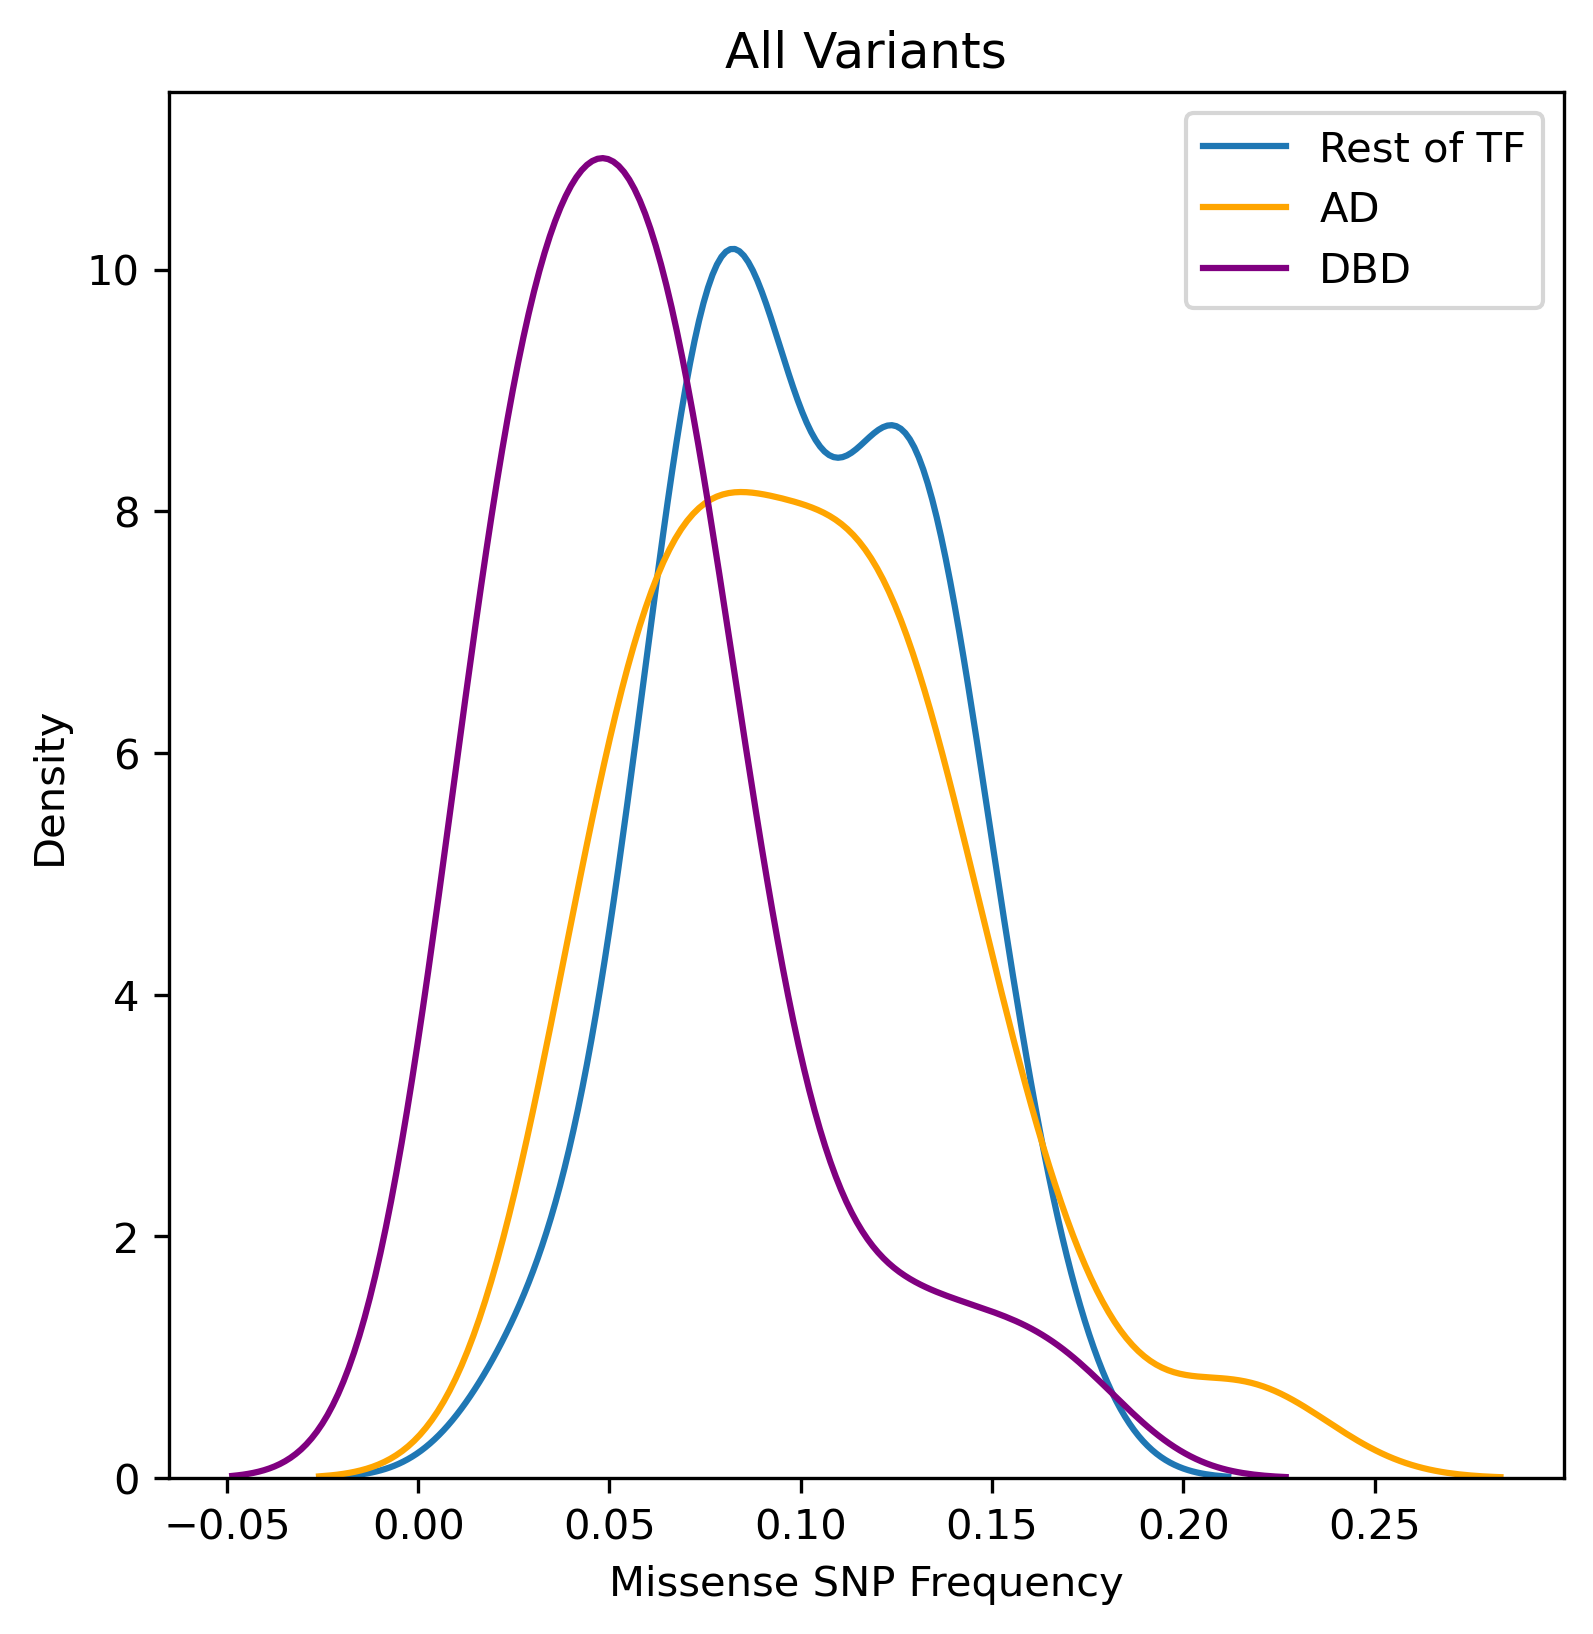

In [79]:
plt.figure(figsize = (6,6), dpi = 300);

rest_of_TF_prop = (contains_DBD["TF_missense"] - contains_DBD["AD_missense"]) \
/ (contains_DBD["TF_cds_length"] - contains_DBD["AD_cds_length"])

sns.kdeplot(rest_of_TF_prop, label = "Rest of TF");
sns.kdeplot(contains_DBD["AD_missense_prop"], color = "orange", label = "AD");
sns.kdeplot(contains_DBD["DBD_missense_prop"], color = "purple", label = "DBD");


plt.legend()
plt.xlabel("Missense SNP Frequency")
plt.title("All Variants")

Text(0.5, 1.0, 'All Variants')

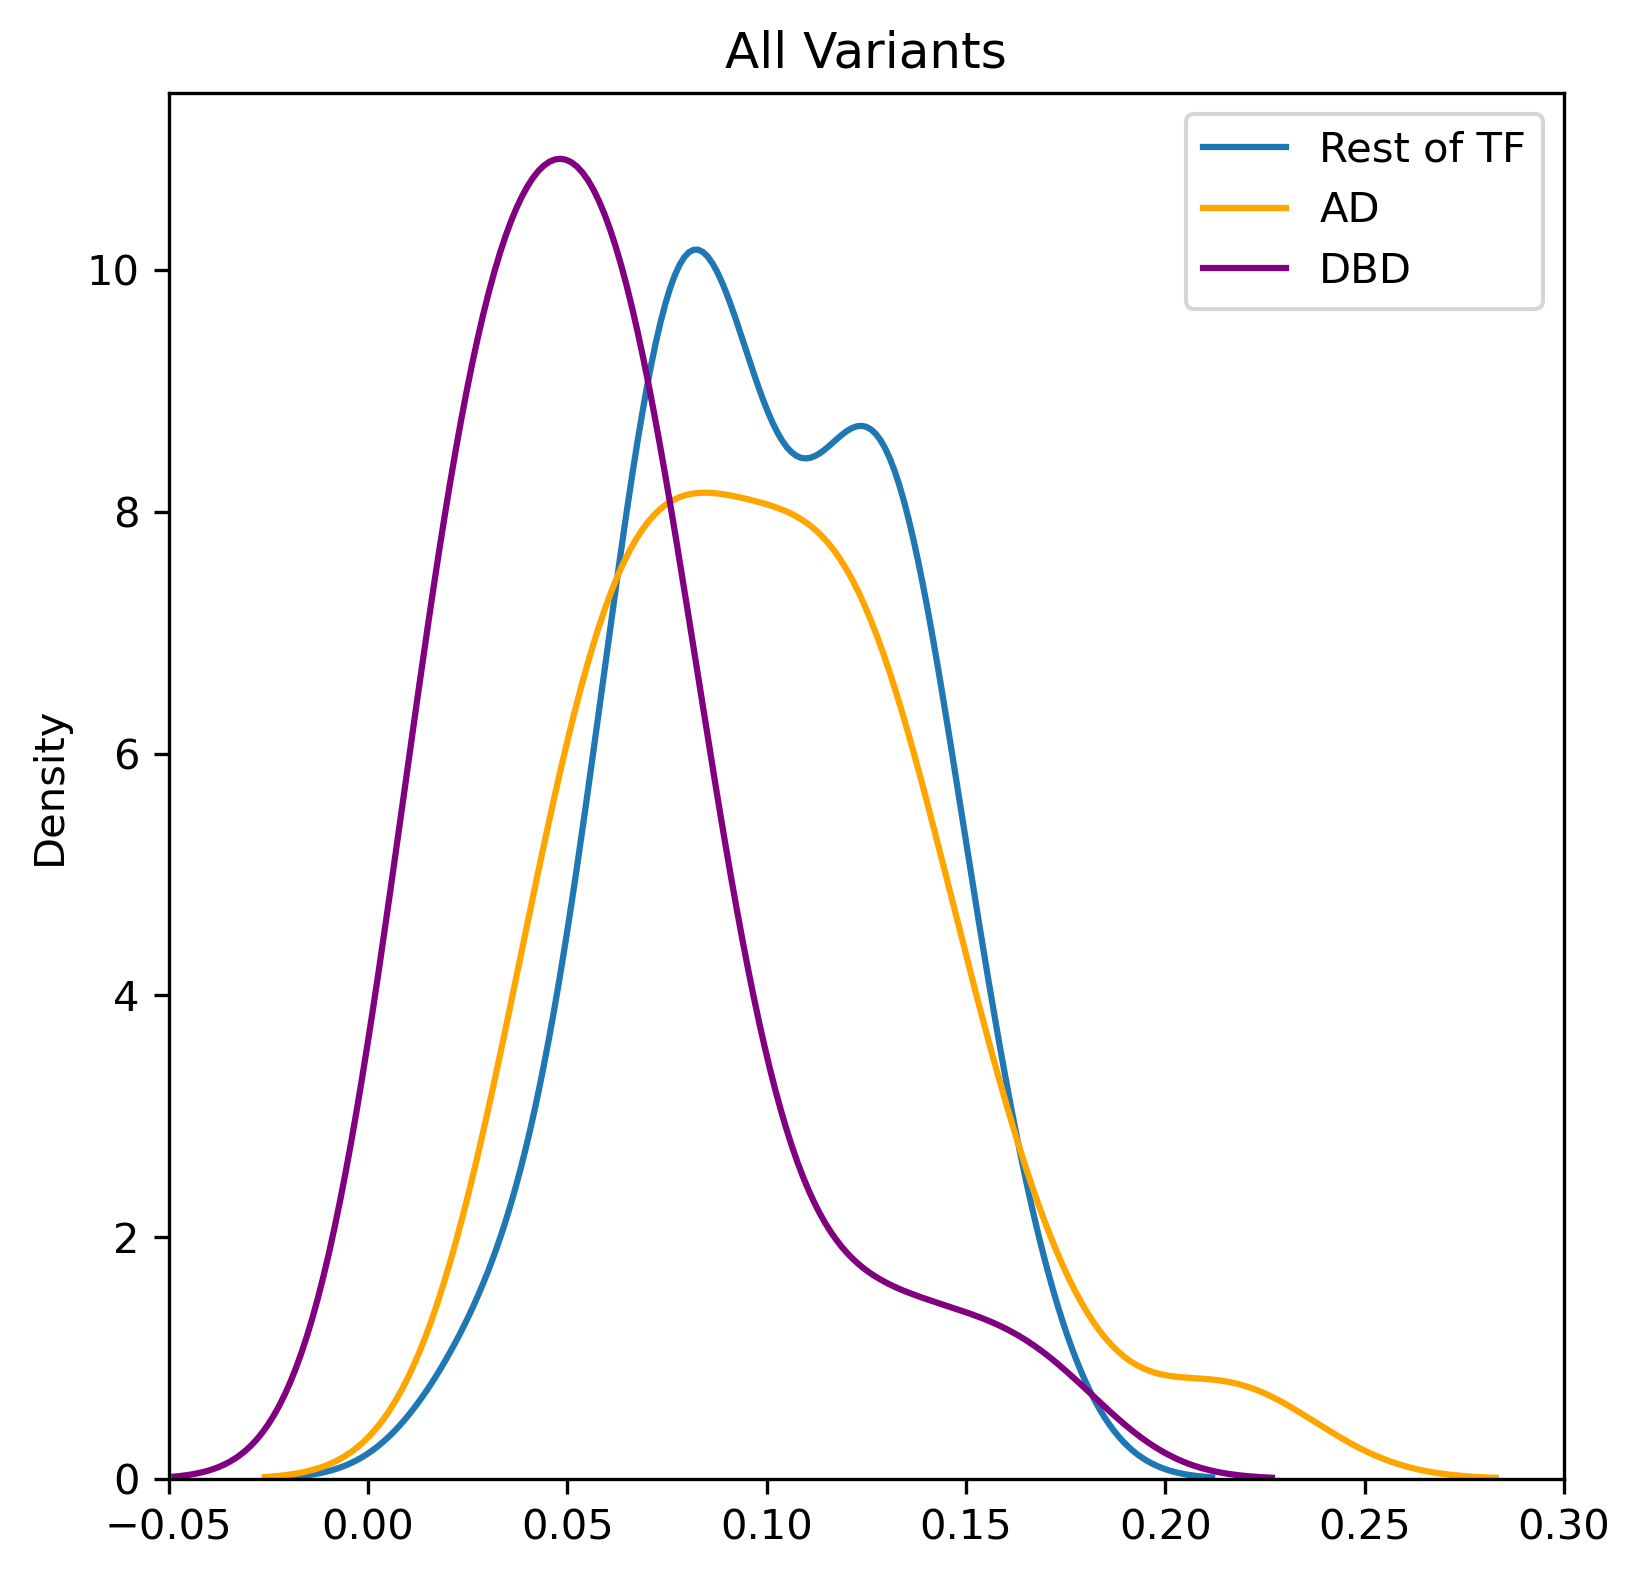

In [77]:
plt.figure(figsize = (6,6), dpi = 300);
plt.xlim(-0.05, 0.3)


rest_of_TF_prop = (contains_DBD["TF_missense"] - contains_DBD["AD_missense"]) \
/ (contains_DBD["TF_cds_length"] - contains_DBD["AD_cds_length"])

sns.kdeplot(rest_of_TF_prop, label = "Rest of TF");
sns.kdeplot(contains_DBD["AD_missense_prop"], color = "orange", label = "AD");
sns.kdeplot(contains_DBD["DBD_missense_prop"], color = "purple", label = "DBD");


plt.legend()
plt.xlabel("")
plt.title("All Variants")

In [62]:
contains_DBD.to_csv("../outputs/DBD_results_tbl.csv")